In [4]:
import os 
!pip install tensorflow



  Using cached tensorflow-2.6.0-cp37-cp37m-win_amd64.whl (423.2 MB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.6.0-py2.py3-none-any.whl (462 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached keras-2.6.0-py2.py3-none-any.whl (1.3 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-1.40.0-cp37-cp37m-win_amd64.whl (3.2 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorboard-2.6.0-py3-none-any.whl (5.6 MB)
  Using cached absl_py-0.13.0-py3-none-any.whl (132 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached clang-5.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached cached_property-1.5.2-py2.py3-none-any.whl (7.6 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (

In [1]:
import tensorflow as tf
import sys
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import numpy as np
from tensorflow.python.framework.ops import EagerTensor
import pprint
%matplotlib inline

In [7]:
tf.random.set_seed(272)
pp = pprint.PrettyPrinter(indent=4)
img_size = 400
vgg = tf.keras.applications.VGG19(include_top = False,
                                  input_shape=(img_size,img_size,3),
                                  weights = "C:/Users/91942/PycharmProjects/deepL/deeplTENSORFLOW/art generation transfer learning/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")
vgg.trainable = False
pp.pprint(vgg)

The content image (C) shows the cat.


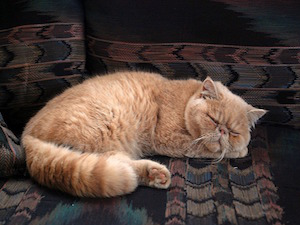

In [17]:
content_image = Image.open("E:/Artgeneration/images/persian_cat_content.jpg")
print("The content image (C) shows the cat.")
content_image

The Style image (S) shows the stones


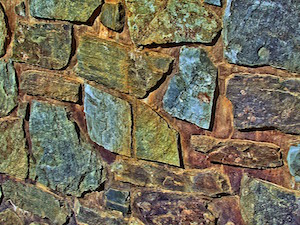

In [16]:
style_image = Image.open("E:/Artgeneration/images/stone_style.jpg")
print("The Style image (S) shows the stones")
style_image

In [18]:
def compute_content_cost(content_output, generated_output):
    a_C = content_output[-1]
    a_G = generated_output[-1]
    m,n_H,n_W,n_C = a_G.get_shape().as_list()
    a_C_unrolled = tf.reshape(a_C, shape = [m,-1,n_C])
    a_G_unrolled = tf.reshape(a_G, shape = [m,n_H*n_W,n_C])
    J_content = (1/(4*n_H*n_W*n_C)) * (tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled, a_G_unrolled))))

    return J_content

In [19]:
tf.random.set_seed(1)
a_C = tf.random.normal([1,4,4,3], mean =1, stddev=4)
a_G = tf.random.normal([1,4,4,3], mean=1,stddev=4)
J_content = compute_content_cost([a_C], [a_G])
J_content_0 = compute_content_cost([a_C],[a_G])

print("J_content = "+ str(J_content))
ll = tf.keras.layers.Dense(8, activation="relu", input_shape=(1,4,4,3))
model_tmp = tf.keras.models.Sequential()
model_tmp.add(ll)

J_content = tf.Tensor(7.056877, shape=(), dtype=float32)


In [20]:
def gram_matrix(A):
    GA = tf.matmul(A, tf.transpose(A))
    return GA

In [21]:
tf.random.set_seed(1)
A = tf.random.normal([3, 2*1], mean=1, stddev=4)
GA = gram_matrix(A)
print("GA = \n" + str(GA))

GA = 
tf.Tensor(
[[ 63.1888    -26.721275   -7.7320204]
 [-26.721275   12.76758    -2.5158243]
 [ -7.7320204  -2.5158243  23.752384 ]], shape=(3, 3), dtype=float32)


In [22]:
def compute_layer_style_cost(a_S, a_G):
    m, n_H, n_W, n_C = a_G.get_shape().as_list()
    a_S = tf.transpose(tf.reshape(a_S, ([n_H*n_W, n_C])))
    a_G = tf.transpose(tf.reshape(a_G, ([n_H*n_W, n_C])))
    GS = gram_matrix(a_S)
    GG = gram_matrix(a_G)
    J_style_layer = 1./(4*n_C**2 *(n_H*n_W)**2)*tf.reduce_sum(tf.pow((GS - GG), 2))

    return J_style_layer


In [23]:
tf.random.set_seed(1)
a_G = tf.random.normal([1,4,4,3], mean=1,stddev=4)
a_S = tf.random.normal([1,4,4,3], mean=1,stddev=4)
J_style_layer_GG = compute_layer_style_cost(a_G, a_G)
J_style_layer_SG = compute_layer_style_cost(a_S, a_G)
print("J_style_layer = " + str(J_style_layer_SG))
ll = tf.keras.layers.Dense(8, activation="relu", input_shape=(1,4,4,3))
model_tmp = tf.keras.models.Sequential()
model_tmp.add(ll)
for layer in vgg.layers:
    print(layer.name)

J_style_layer = tf.Tensor(14.017808, shape=(), dtype=float32)
input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [24]:
for layer in vgg.layers:
    print(layer.name)

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [25]:
STYLE_LAYERS = [
    ('block1_conv1', 0.2),
    ('block2_conv1', 0.2),
    ('block3_conv1', 0.2),
    ('block4_conv1', 0.2),
    ('block5_conv1', 0.2)]

In [26]:
def compute_style_cost(style_image_output, generated_image_output, STYLE_LAYERS):
    J_style = 0
    a_S = style_image_output[:-1]
    a_G = generated_image_output[:-1]
    for i, weight in zip(range(len(a_S)), STYLE_LAYERS):
        J_style_layer = compute_layer_style_cost(a_S[i], a_G[i])
        J_style += weight[1] * J_style_layer

    return J_style

In [27]:
@tf.function()
def total_cost(J_content, J_style, alpha=10, beta=40):
    J = alpha*J_content + beta*J_style

    return J

In [28]:
J_content = 0.2    
J_style = 0.8
J = total_cost(J_content, J_style)

np.random.seed(1)
print("J = " + str(total_cost(np.random.uniform(0, 1), np.random.uniform(0, 1))))

print("\033[92mAll tests passed")

J = tf.Tensor(32.9832, shape=(), dtype=float32)
All tests passed


(1, 400, 400, 3)


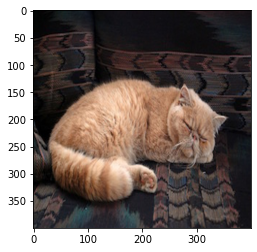

In [29]:
content_image = np.array(Image.open("E:/Artgeneration/images/persian_cat_content.jpg").resize((img_size, img_size)))
content_image = tf.constant(np.reshape(content_image, ((1,) + content_image.shape)))

print(content_image.shape)
imshow(content_image[0])
plt.show()

(1, 400, 400, 3)


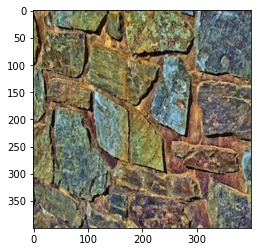

In [30]:
style_image = np.array(Image.open("E:/Artgeneration/images/stone_style.jpg").resize((img_size, img_size)))
style_image = tf.constant(np.reshape(style_image, ((1,) + style_image.shape)))

print(style_image.shape)
imshow(style_image[0])
plt.show()

(1, 400, 400, 3)


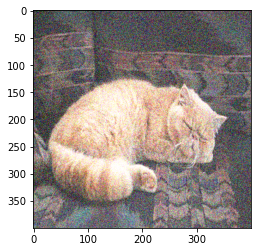

In [39]:
generated_image = tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32))
noise = tf.random.uniform(tf.shape(generated_image), 0, 0.5)
generated_image = tf.add(generated_image, noise)
generated_image = tf.clip_by_value(generated_image, clip_value_min=0.0, clip_value_max=1.0)

print(generated_image.shape)
imshow(generated_image.numpy()[0])
plt.show()


In [32]:
def get_layer_outputs(vgg,layer_names):
    outputs = [vgg.get_layer(layer[0]).output for layer in layer_names]
    model = tf.keras.Model([vgg.input], outputs)
    return model

In [33]:
content_layer = [('block5_conv4', 1)]
vgg_model_outputs = get_layer_outputs(vgg, STYLE_LAYERS + content_layer)

In [34]:
content_target = vgg_model_outputs(content_image)  # Content encoder
style_targets = vgg_model_outputs(style_image)     # Style encoder

In [41]:
preprocessed_content = tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32 ))
a_C = vgg_model_outputs(preprocessed_content)
a_G = vgg_model_outputs(generated_image)
J_content = compute_content_cost(a_C, a_G)
print(J_content)


tf.Tensor(0.009639053, shape=(), dtype=float32)


In [46]:
preprocessed_style =  tf.Variable(tf.image.convert_image_dtype(style_image, tf.float32))
a_S = vgg_model_outputs(preprocessed_style)

# Compute the style cost
J_style = compute_style_cost(a_S, a_G, STYLE_LAYERS)
print(J_style)

tf.Tensor(916.9372, shape=(), dtype=float32)


In [63]:
def clip_0_1(image):
    return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return Image.fromarray(tensor)    

In [64]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
@tf.function()
def train_step(generated_image):
    with tf.GradientTape() as tape:
        a_G = vgg_model_outputs(generated_image)
        J_style = compute_style_cost(a_S, a_G, STYLE_LAYERS)
        J_content = compute_content_cost(a_C, a_G)
        J = total_cost(J_content, J_style, alpha = 10, beta = 40)
    grad = tape.gradient(J, generated_image)
    optimizer.apply_gradients([(grad, generated_image)])
    generated_image.assign(clip_0_1(generated_image))
    
    return J

In [65]:
generated_image = tf.Variable(tf.image.convert_image_dtype(content_image, tf.float32))

J1 = train_step(generated_image)
print(J1)
J2 = train_step(generated_image)
print(J2)

tf.Tensor(19389.4, shape=(), dtype=float32)
tf.Tensor(6561.0327, shape=(), dtype=float32)


Epoch 0 


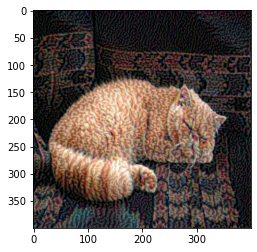

Epoch 250 


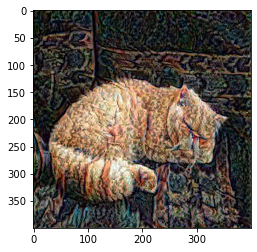

Epoch 500 


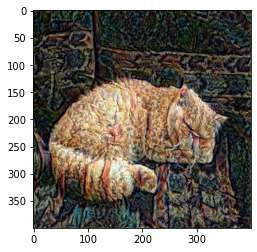

Epoch 750 


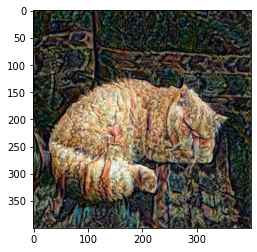

Epoch 1000 


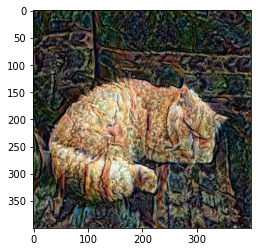

Epoch 1250 


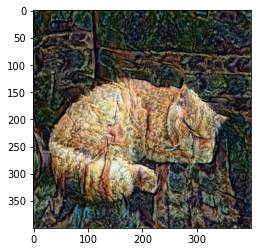

Epoch 1500 


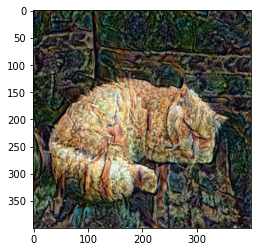

Epoch 1750 


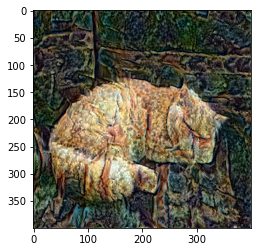

Epoch 2000 


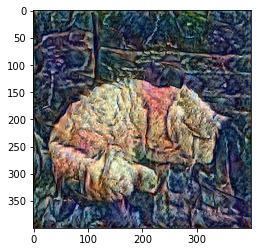

Epoch 2250 


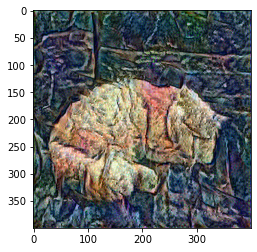

Epoch 2500 


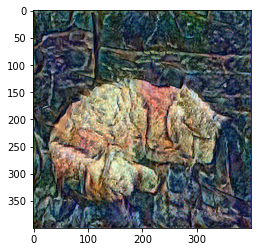

In [67]:
if 
epochs = 2501
for i in range(epochs):
    train_step(generated_image)
    if i % 250 == 0:
        print(f"Epoch {i} ")
    if i % 250 == 0:
        image = tensor_to_image(generated_image)
        imshow(image)
        image.save(f"E:/Artgeneration/images/image_{i}.jpg")
        plt.show() 

In [68]:
print("the above fig is the final generated art\n")

the above fig is the final generated art



the summary of content, style and generated image.



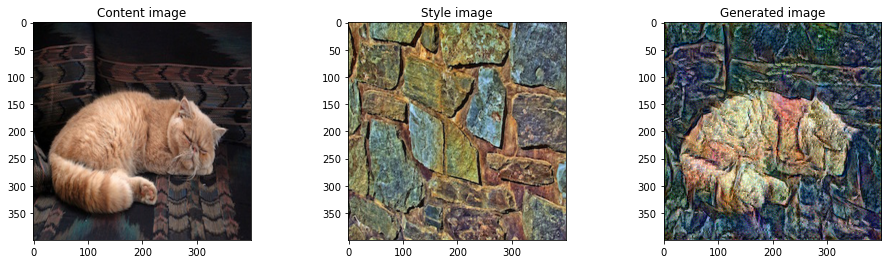

In [70]:
print("the summary of content, style and generated image.\n")
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
imshow(content_image[0])
ax.title.set_text('Content image')
ax = fig.add_subplot(1, 3, 2)
imshow(style_image[0])
ax.title.set_text('Style image')
ax = fig.add_subplot(1, 3, 3)
imshow(generated_image[0])
ax.title.set_text('Generated image')
plt.show()